In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
data=pd.read_csv('/content/test_loan.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [6]:
data.shape

(367, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# 1. Missing Value Hadling

In [9]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#1.a. Filling the missing value

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
data['Gender']=data['Gender'].fillna("Female")

In [13]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
data['Dependents']=data['Dependents'].fillna("2")

In [16]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
data['Self_Employed']=data['Self_Employed'].fillna("Yes")

In [19]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [21]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#2. Outlier Detection

#2.a.ApplicantIncome

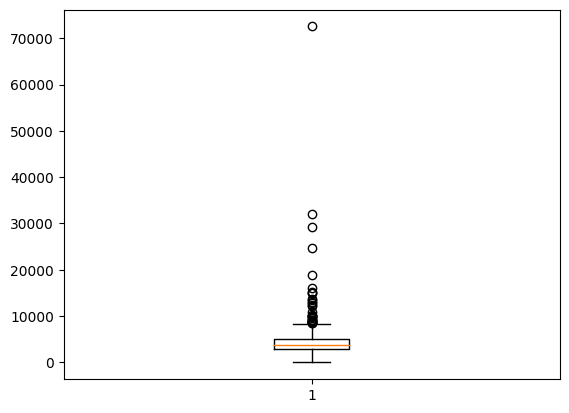

In [22]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [23]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.5)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [24]:
print(lower,upper)

-430.0 8354.0


In [25]:
data[(data['ApplicantIncome']<lower)| (data['ApplicantIncome']>upper)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [26]:
data = data.drop([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366])

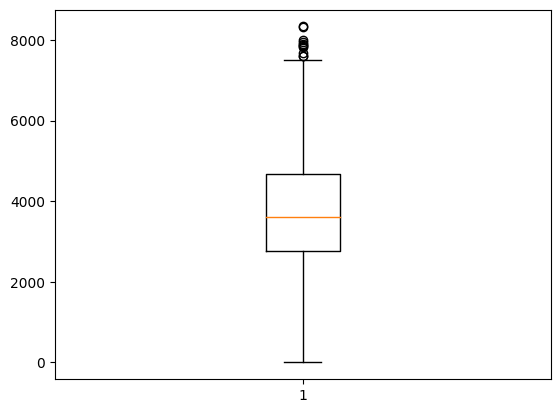

In [27]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

#2.b CoapplicantIncome

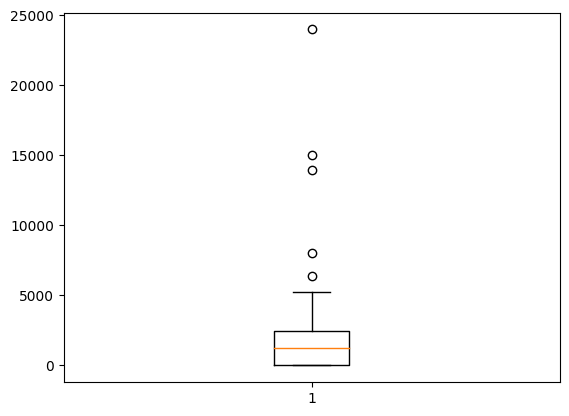

In [28]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [29]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q2 = data['CoapplicantIncome'].quantile(0.5)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [30]:
print(lower,upper)

-3699.0 6165.0


In [31]:
data[(data['CoapplicantIncome']<lower)| (data['CoapplicantIncome']>upper)].index

Int64Index([25, 85, 123, 237, 351], dtype='int64')

In [32]:
data = data.drop([25, 85, 123, 237, 351])

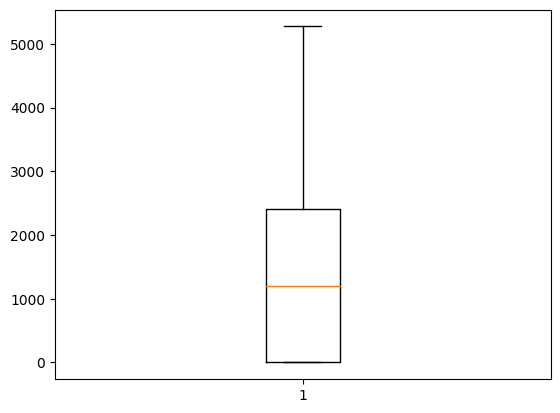

In [33]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

#2.c LoanAmount

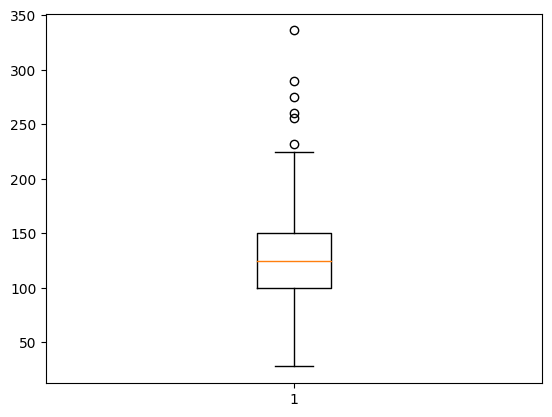

In [34]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [35]:
Q1 = data['LoanAmount'].quantile(0.25)
Q2 = data['LoanAmount'].quantile(0.5)
Q3 = data['LoanAmount'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [36]:
print(lower,upper)

25.0 225.0


In [37]:
data[(data['LoanAmount']<lower)| (data['LoanAmount']>upper)].index

Int64Index([24, 27, 73, 96, 189, 345], dtype='int64')

In [38]:
data = data.drop([24, 27, 73, 96, 189, 345])

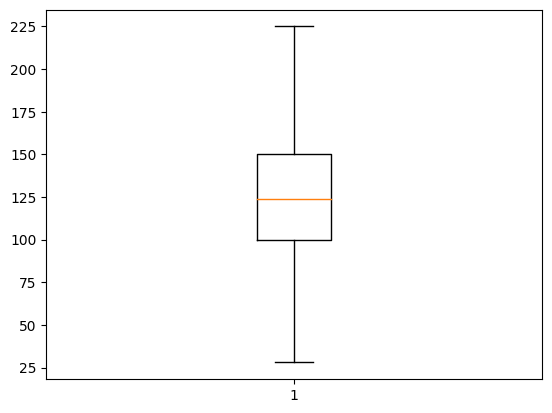

In [39]:
plt.boxplot(data['LoanAmount'])
plt.show()

#2.d Loan_Amount_Term

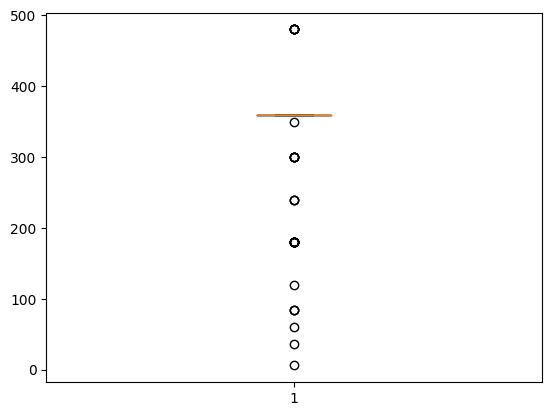

In [40]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [41]:
Q1 = data['Loan_Amount_Term'].quantile(0.25)
Q2 = data['Loan_Amount_Term'].quantile(0.5)
Q3 = data['Loan_Amount_Term'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [42]:
print(lower,upper)

360.0 360.0


In [43]:
data[(data['Loan_Amount_Term']<lower)| (data['Loan_Amount_Term']>upper)].index

Int64Index([ 12,  19,  21,  29,  36,  53,  57,  59,  72,  82,  84, 101, 103,
            128, 134, 141, 155, 157, 164, 173, 190, 215, 216, 222, 223, 232,
            239, 245, 249, 250, 251, 266, 277, 295, 312, 314, 315, 322, 325,
            338, 340, 342, 349, 354],
           dtype='int64')

#2.e Credit_History

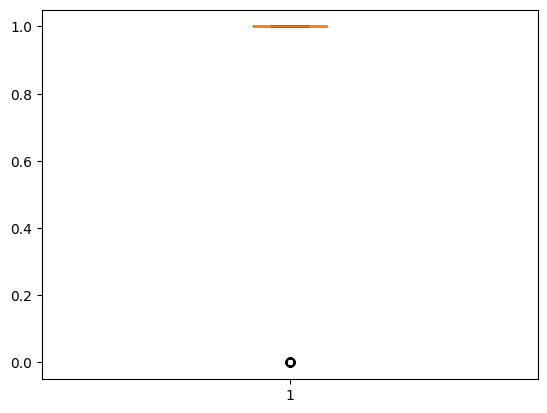

In [45]:
plt.boxplot(data['Credit_History'])
plt.show()

In [46]:
Q1 = data['Credit_History'].quantile(0.25)
Q2 = data['Credit_History'].quantile(0.5)
Q3 = data['Credit_History'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [47]:
print(lower,upper)

1.0 1.0


In [48]:
data[(data['Credit_History']<lower)| (data['Credit_History']>upper)].index

Int64Index([  7,  35,  55,  58,  63,  66,  67,  69,  80,  82,  84,  94, 101,
            106, 117, 118, 119, 126, 140, 142, 153, 161, 165, 166, 168, 173,
            174, 192, 193, 196, 198, 211, 224, 229, 235, 236, 241, 243, 245,
            250, 255, 266, 268, 273, 274, 278, 293, 301, 311, 317, 325, 339,
            346, 354],
           dtype='int64')

# 3. Encoding

#3.a Label Encoding

In [49]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
le = LabelEncoder()

In [51]:
data['Married']=le.fit_transform(data['Married'])

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
data.dtypes

Loan_ID               object
Gender                object
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#3.b One hot Encoding

In [54]:
data=pd.get_dummies(data)

In [55]:
data.head()

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,5720,0,110.0,360.0,1.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
2,1,5000,1800,208.0,360.0,1.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
3,1,2340,2546,100.0,360.0,1.0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [56]:
data.dtypes

Married                      int64
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
                            ...   
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Length: 343, dtype: object

#4.Scaling

In [57]:
sc=StandardScaler()

In [58]:
data.loc[:,['LoanAmount','Loan_Amount_Term']]=sc.fit_transform(data[['LoanAmount','Loan_Amount_Term']])

In [59]:
data.describe()

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,324.000000,324.000000,324.000000,3.240000e+02,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.626543,3816.194444,1368.712963,-1.151342e-16,1.699601e-16,0.833333,0.003086,0.003086,0.003086,0.003086,...,0.160494,0.179012,0.101852,0.753086,0.246914,0.848765,0.151235,0.287037,0.333333,0.379630
std,0.484470,1494.817382,1427.908868,1.001547e+00,1.001547e+00,0.373254,0.055556,0.055556,0.055556,0.055556,...,0.367631,0.383956,0.302921,0.431883,0.431883,0.358832,0.358832,0.453079,0.472134,0.486045
min,0.000000,0.000000,0.000000,-2.483430e+00,-5.267400e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2767.250000,0.000000,-6.319886e-01,2.671338e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3598.000000,1136.000000,-1.484137e-02,2.671338e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4623.250000,2394.750000,6.537348e-01,2.671338e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,8333.000000,5272.000000,2.582320e+00,2.143247e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data.head()

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,5720,0,-0.374844,0.267134,1.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,3076,1500,0.036588,0.267134,1.0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
2,1,5000,1800,2.145174,0.267134,1.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
3,1,2340,2546,-0.631989,0.267134,1.0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,3276,0,-1.197707,0.267134,1.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
